Columns in results\student_layer_4.csv : ['Step', 'Distillation Loss', 'CE Loss', 'Accumulated Distillation Loss', 'Accumulated CE Loss']
Columns in results\student_layer_5.csv : ['Step', 'Distillation Loss', 'CE Loss', 'Accumulated Distillation Loss', 'Accumulated CE Loss']
Columns in results\student_layer_6.csv : ['Step', 'Distillation Loss', 'CE Loss', 'Accumulated Distillation Loss', 'Accumulated CE Loss']
Columns in results\student_layer_7.csv : ['Step', 'Distillation Loss', 'CE Loss', 'Accumulated Distillation Loss', 'Accumulated CE Loss']
Columns in results\student_layer_8.csv : ['Step', 'Distillation Loss', 'CE Loss', 'Accumulated Distillation Loss', 'Accumulated CE Loss']


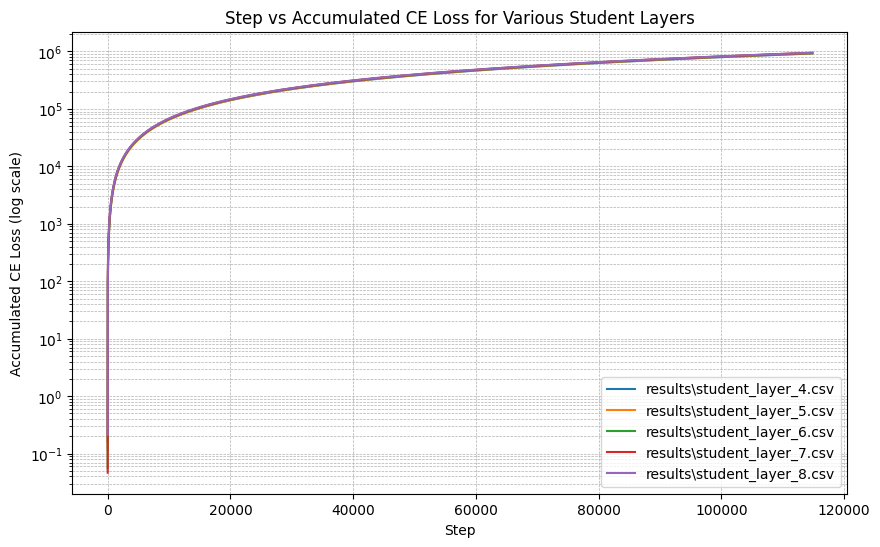

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Locate CSV files matching the pattern
csv_files = glob.glob("results/student_layer_*.csv")
csv_files.sort()  # Sort to maintain order

plt.figure(figsize=(10, 6))

for file in csv_files:
    # Read CSV using comma as delimiter and skip initial spaces
    df = pd.read_csv(file, sep=",", skipinitialspace=True)
    
    # Clean column names: remove extra spaces and leading/trailing quotes if any
    df.columns = [col.strip().strip('"') for col in df.columns]
    
    # Debug: Print the column names to ensure they are split correctly.
    print("Columns in", file, ":", df.columns.tolist())
    
    # Convert columns to numeric if they aren’t already; this helps with plotting
    df["Step"] = pd.to_numeric(df["Step"], errors='coerce')
    df["Accumulated CE Loss"] = pd.to_numeric(df["Accumulated CE Loss"], errors='coerce')
    
    # Plot Step vs Accumulated CE Loss on a log scale (Y-axis) using semilogy
    plt.semilogy(df["Step"], df["Accumulated CE Loss"], label=file)

# Customize the plot
plt.xlabel("Step")
plt.ylabel("Accumulated CE Loss (log scale)")
plt.title("Step vs Accumulated CE Loss for Various Student Layers")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Save the plot to a file before showing it
plt.savefig("log_scale_AccuCELoss_(semilogy).png", dpi=800, bbox_inches="tight")
plt.show()


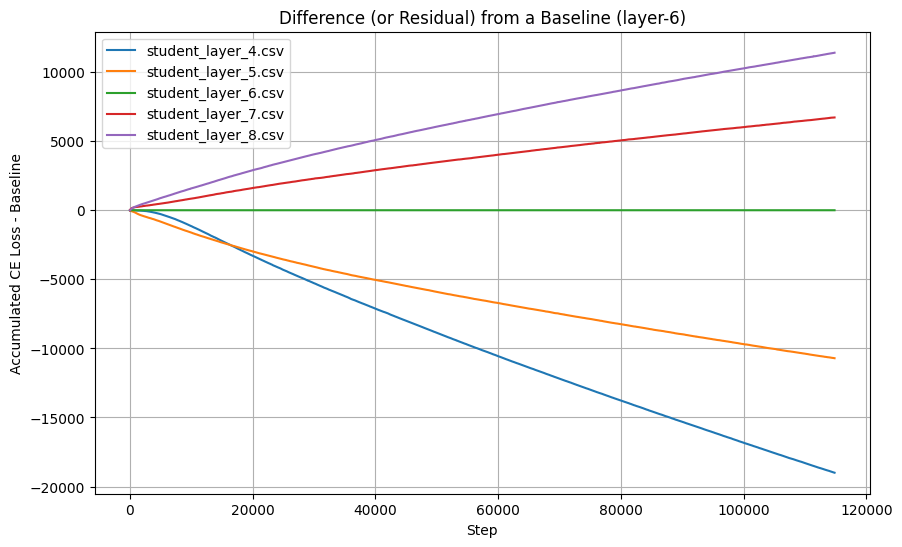

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Locate CSV files matching the pattern
# Gather all CSV files
csv_files = glob.glob("results/student_layer_*.csv")
csv_files.sort()

# A dictionary to store each file's DataFrame
data_dict = {}

# Read all files first
for file in csv_files:
    df = pd.read_csv(file, sep=",", skipinitialspace=True)
    # Clean columns
    df.columns = [col.strip().strip('"') for col in df.columns]
    
    # Ensure numeric
    df["Step"] = pd.to_numeric(df["Step"], errors='coerce')
    df["Accumulated CE Loss"] = pd.to_numeric(df["Accumulated CE Loss"], errors='coerce')
    data_dict[file] = df

# Pick the first CSV as baseline (or pick whichever you like)
baseline_file = csv_files[2]
df_baseline = data_dict[baseline_file]

# Now, plot differences relative to the baseline
plt.figure(figsize=(10, 6))

for file in csv_files:
    df = data_dict[file]

    # Ensure lengths match if you're going to do a direct subtraction.
    # If they don’t match, you may need to merge/align by Step.
    if len(df) == len(df_baseline):
        diff_ce_loss = df["Accumulated CE Loss"] - df_baseline["Accumulated CE Loss"]
        
        plt.plot(df["Step"], diff_ce_loss, label=file.split("\\")[-1])
    else:
        # If the lengths differ, consider merging on "Step" or reindexing.
        merged = pd.merge(df_baseline, df, on="Step", how="inner", suffixes=("_base", "_compare"))
        diff_ce_loss = merged["Accumulated CE Loss_compare"] - merged["Accumulated CE Loss_base"]
        
        plt.plot(merged["Step"], diff_ce_loss, label=file.split("\\")[-1])

plt.xlabel("Step")
plt.ylabel("Accumulated CE Loss - Baseline")
plt.title("Difference (or Residual) from a Baseline (layer-6)")
plt.grid(True)
plt.legend()


# Save the plot to a file before showing it
plt.savefig("Difference (or Residual) from a Baseline.png", dpi=800, bbox_inches="tight")
plt.show()


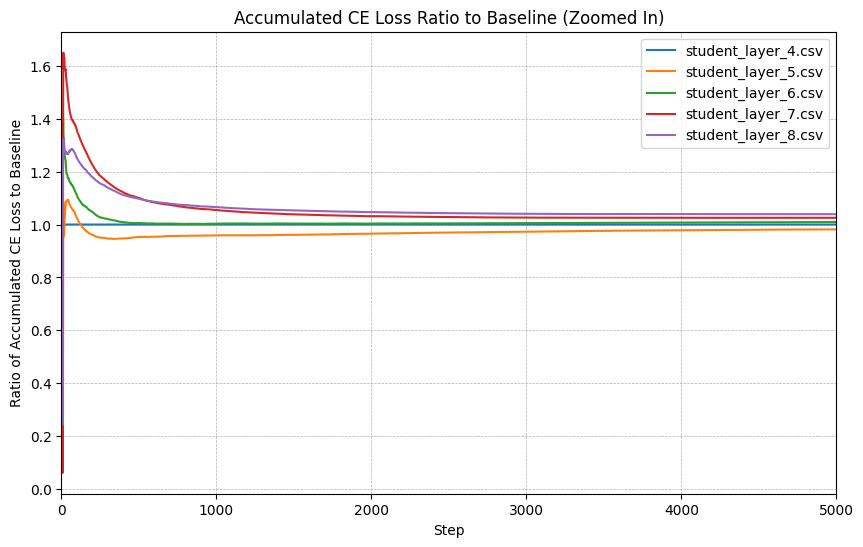

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# 1. Retrieve the list of CSV files matching the pattern.
csv_files = glob.glob("results/student_layer_*.csv")
csv_files.sort()  # sorting to maintain a defined order

# 2. Read each CSV into a dictionary and clean the column names.
data_dict = {}
for file in csv_files:
    # Use a comma as the separator; adjust skipinitialspace if necessary
    df = pd.read_csv(file, sep=",", skipinitialspace=True)
    # Remove extra spaces and quotes from each column header.
    df.columns = [col.strip().strip('"') for col in df.columns]
    
    # Convert the relevant columns to numeric (if not already) to ensure proper plotting.
    df["Step"] = pd.to_numeric(df["Step"], errors='coerce')
    df["Accumulated CE Loss"] = pd.to_numeric(df["Accumulated CE Loss"], errors='coerce')
    
    data_dict[file] = df

# 3. Choose one file as the baseline (here, the first file in the sorted list).
baseline_file = csv_files[0]
df_baseline = data_dict[baseline_file]

plt.figure(figsize=(10, 6))

# 4. Loop over each file, compute and plot the ratio of Accumulated CE Loss to the baseline.
for file in csv_files:
    df = data_dict[file]
    
    # Ensure alignment of steps: if the number of rows is the same, directly compute the ratio;
    # otherwise, merge on 'Step'.
    if len(df) == len(df_baseline):
        ratio = df["Accumulated CE Loss"] / df_baseline["Accumulated CE Loss"]
        steps = df["Step"]
    else:
        merged = pd.merge(df_baseline, df, on="Step", how="inner", suffixes=("_baseline", "_compare"))
        ratio = merged["Accumulated CE Loss_compare"] / merged["Accumulated CE Loss_baseline"]
        steps = merged["Step"]
    
    # Plot the ratio. The label is taken from the file name (last part after the path separator).
    plt.plot(steps, ratio, label=file.split("\\")[-1])

# 5. Customize the plot.
plt.xlabel("Step")
plt.ylabel("Ratio of Accumulated CE Loss to Baseline")
plt.title("Accumulated CE Loss Ratio to Baseline (Zoomed In)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Zoom into a subrange on the X-axis (adjust the range as needed)
plt.xlim(0, 5000)

# Save the figure to a file
plt.savefig("results_plot_ratio_zoom.png", dpi=300, bbox_inches="tight")
plt.show()
